# Bonus: Temperature Analysis I

In [1]:
import pandas as pd
from datetime import datetime as dt
import scipy.stats as stats

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [4]:
# Convert the date column format from string to datetime
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d") 
df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [5]:
# Set the date column as the DataFrame index
df.set_index(['date'])

,station,prcp,tobs
date,,,
2010-01-01,USC00519397,0.08,65
2010-01-02,USC00519397,0.00,63
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [6]:
# Drop the date column


### Compare June and December data across all years 

In [7]:
from scipy import stats

In [8]:
# Filter data for desired months
df_June = df[df['date'].dt.month_name() == 'June']
df_Dec = df[df['date'].dt.month_name() == 'December']

In [13]:
# Identify the average temperature for June
df_June.tobs.mean()

74.94411764705882

In [14]:
# Identify the average temperature for December
df_Dec.tobs.mean()

71.04152933421226

In [15]:
# Create collections of temperature data
dec_temp=df_Dec['tobs']
june_temp=df_June['tobs']


### Analysis

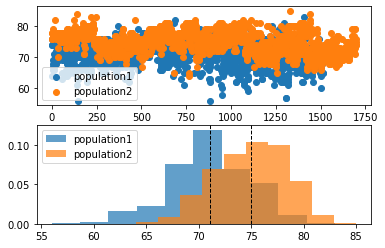

In [16]:
    population1 = dec_temp
    population2 = june_temp

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend() 


In [17]:
# Run paired t-test
stats.ttest_ind(dec_temp, june_temp, equal_var=False)

Ttest_indResult(statistic=-31.355036920962423, pvalue=4.193529835915755e-187)